## Influence des hyperparamètres du critère d'Armijo dans le cas d'une descente de gradient pour une fonction convexe

## 1. Fonctions Convexes : 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

def quadratic1_(x, gamma):
    return gamma * (x**2) + x + 1

def quadratic2_(x, gamma):
    return quadratic1_(x[0], gamma[0]) + quadratic1_(x[1], gamma[1])

def create_system(dim, cond=10, seed=100):
    np.random.seed(seed)
    A = 0.1 * np.random.uniform(-math.sqrt(cond), math.sqrt(cond), size=(dim,dim))
    A = np.triu(A)
    A = A - np.diag(np.diag(A)) + np.diag(np.random.uniform(1., math.sqrt(cond), size=(dim))) 
    A[0,0] = 1.
    A[1,1] = math.sqrt(cond)
    b = 1. * np.random.randint(-10, 10, size=(dim))
    A = A.T @ A
    return A, b

A, b = create_system(2, cond=10)

def quadraticn_(x):
    return (x.T @ A @ x) / 2 - b.T @ x

### Quadratic 1

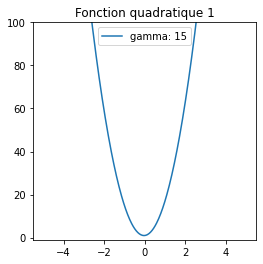

<Figure size 432x288 with 0 Axes>

In [55]:
fig, ax = plt.subplots(figsize=(4, 4))
x = np.linspace(-5, 5, 400)
ax.set_ylim(-1, 100)

ax.plot(x, quadratic1_(x, 15), label="gamma: {}".format(15))
ax.set_title("Fonction quadratique 1")
ax.legend()
plt.show()
plt.savefig("quadratic1.png")

### Quadratic 2

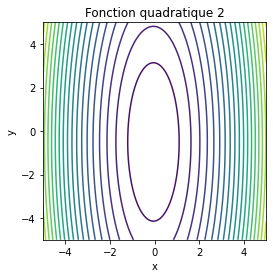

<Figure size 432x288 with 0 Axes>

In [54]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -5, 5, -5, 5
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

gamma=np.zeros(2)
gamma[0]=10
gamma[1]=1

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=quadratic2_(np.array([X[i,j],Y[i,j]]),gamma)

fig, ax = plt.subplots(1, 1, figsize=(4, 4)) 

ax.contour(X, Y, Z,20) 
  
ax.set_title('Fonction quadratique 2') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()
plt.savefig("quadratic2.png")

### Quadratic n

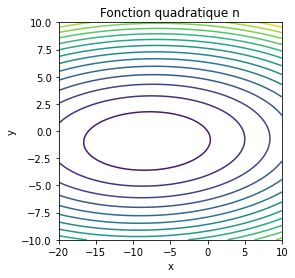

<Figure size 432x288 with 0 Axes>

In [56]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -20, 10, -10, 10

x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

dim=2
A,b = create_system(dim,cond=10)

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=quadraticn_(np.array([X[i,j],Y[i,j]]))

fig, ax = plt.subplots(1, 1, figsize=(4, 4)) 

ax.contour(X, Y, Z,15) 
  
ax.set_title('Fonction quadratique n') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()
plt.savefig("quadratic3.png")

## Fonction du critère d'Armijo et méthode de descente du gradient

In [17]:
def partial(f, x, i=0, dx=1e-8):
    """Computes i-th partial derivative of f at point x.

    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.

    Output:
        (float)

    """
    if np.isscalar(x):
        return (f(x + dx) - f(x - dx)) / (2*dx)
    else:
        h = np.zeros(x.size)
        h[i] = dx
        return (f(x + h) - f(x - h)) / (2*dx)

def gradient(f, x, dx=1e-8):
    """Computes gradient of f at point x.

    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.

    Output:
        (ndarray) of size domain of f.

    """
    if np.isscalar(x):
        return partial(f, x, dx=dx)
    else:
        grad = np.zeros(len(x))
        for i in range(len(x)):
            grad[i] = partial(f, x, i, dx)
    
        return grad

In [18]:
def backtrack(x0, f, dir_x, alpha, beta):
    eta = 1
    cond1 = f(x0 + eta * dir_x)
    cond2 = f(x0) + alpha * eta * dir_x * gradient(f, x0)
    while np.any(cond1 > cond2):
        eta = beta * eta
        cond1 = f(x0 + eta * dir_x)
        cond2 = f(x0) + alpha * eta * dir_x * gradient(f, x0)
    return eta

def desc_grad_opti(f, x0, alpha=0.4, beta=0.8, eps=1E-6):
    xk = []
    xk.append(x0)
    i = 0
    grad = gradient(f, xk[i])
    dk = -grad
    eta  = backtrack(xk[i], f, dk, alpha, beta)
    pk = xk[i] + eta * dk
    xk.append(pk)
    i += 1
    while (np.linalg.norm(xk[i] - xk[i - 1]) >= eps):
        grad = gradient(f, xk[i])
        dk = -grad
        eta  = backtrack(xk[i], f, dk, alpha, beta)
        pk = xk[i] + eta * dk
        xk.append(pk)
        i += 1
    return xk

## Benchmarks et affichage

Starting benchmark for function Quadratique_1...
Starting benchmark for function Quadratique_2...
Starting benchmark for function Quadratique_n...


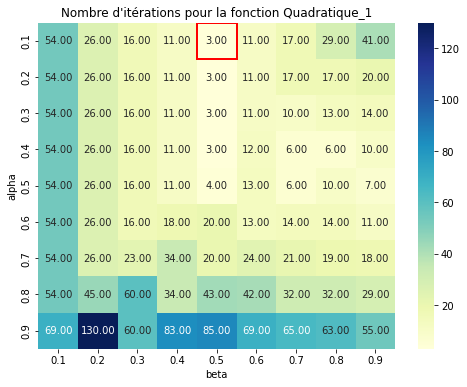

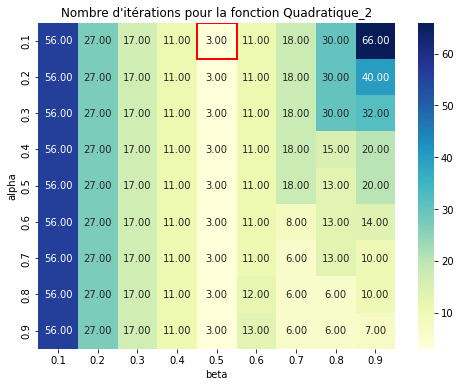

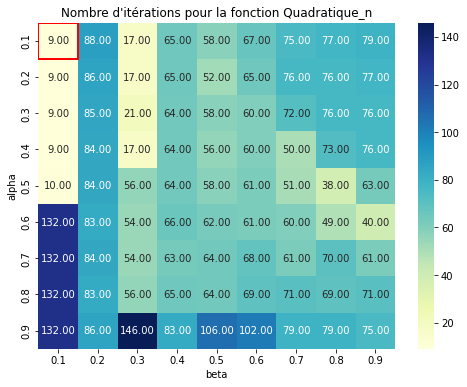

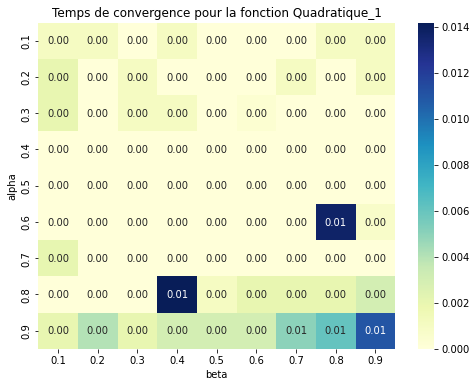

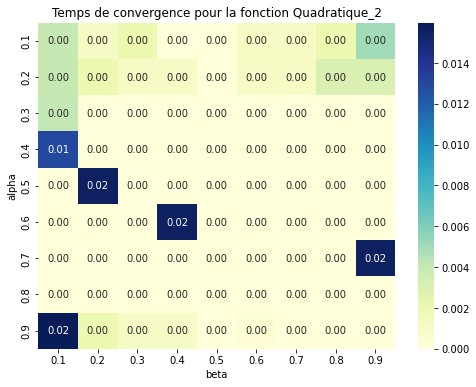

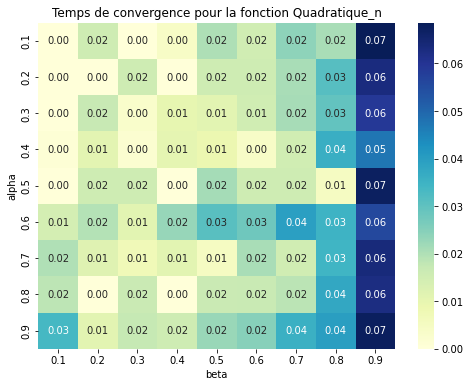

Regression results for function Quadratique_1:
 - Metric: nb_iterations
   - Slope: 49.555555555555586
   - Intercept: 3.703703703703688
   - R-value: 0.5510948656509808
   - P-value: 9.75672690245332e-08
   - Std Err: 8.442069150474113
 - Metric: convergence_time
   - Slope: 0.003771084326284905
   - Intercept: -0.0007239580154418954
   - R-value: 0.3710103510978329
   - P-value: 0.0006502183534123668
   - Std Err: 0.0010619615380874335
Regression results for function Quadratique_2:
 - Metric: nb_iterations
   - Slope: -12.722222222222229
   - Intercept: 26.34876543209877
   - R-value: -0.20460956871674946
   - P-value: 0.06690654624113444
   - Std Err: 6.847575461711323
 - Metric: convergence_time
   - Slope: -9.493033091227241e-05
   - Intercept: 0.0014832924913477017
   - R-value: -0.006626059884366704
   - P-value: 0.9531844637475297
   - Std Err: 0.0016118571814927995
Regression results for function Quadratique_n:
 - Metric: nb_iterations
   - Slope: 42.09259259259262
   - Interc

In [63]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def benchmark_gradient_descent(f, x0, alphas, betas):
    results = []
    for alpha in alphas:
        for beta in betas:
            start_time = time.time()
            xk = desc_grad_opti(f, x0, alpha=alpha, beta=beta)
            end_time = time.time()
            nb_iterations = len(xk)
            convergence_time = end_time - start_time
            final_value = f(xk[-1])
            results.append({
                'alpha': alpha,
                'beta': beta,
                'nb_iterations': nb_iterations,
                'convergence_time': convergence_time,
                'final_value': final_value
            })
    return pd.DataFrame(results)

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

gamma1 = 1
gamma2 = [1, 1]

quadratic1_ = lambda x: gamma1 * (x**2) + x + 1
quadratic2_ = lambda x: quadratic1_(x[0]) + quadratic1_(x[1])

functions = [quadratic1_, quadratic2_, quadraticn_]
function_names = ["Quadratique_1", "Quadratique_2", "Quadratique_n"]
x0_values = [0, np.zeros(2), np.zeros(2)]

all_results = {}

for f, name, x0 in zip(functions, function_names, x0_values):
    print(f"Starting benchmark for function {name}...")
    result = benchmark_gradient_descent(f, x0, alphas, betas)
    all_results[name] = result

# Plotting the number of iterations
for name, result in all_results.items():
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(result.pivot('alpha', 'beta', 'nb_iterations'), annot=True, fmt=".2f", cmap='YlGnBu')
    best_index = result['nb_iterations'].idxmin()
    best_row, best_col = np.unravel_index(best_index, result.pivot('alpha', 'beta', 'nb_iterations').shape)
    ax.add_patch(plt.Rectangle((best_col, best_row), 1, 1, fill=False, edgecolor='red', lw=2))
    plt.title(f"Nombre d\'itérations pour la fonction {name}")
    plt.show()

# Plotting the convergence time
for name, result in all_results.items():
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(result.pivot('alpha', 'beta', 'convergence_time'), annot=True, fmt=".2f", cmap='YlGnBu')
    best_index = result['convergence_time'].idxmin()
    best_row, best_col = np.unravel_index(best_index, result.pivot('alpha', 'beta', 'convergence_time').shape)
    plt.title(f"Temps de convergence pour la fonction {name}")
    plt.show()

# Regression analysis
regression_results = {}
for name, result in all_results.items():
    regression_results[name] = {}
    for metric in ['nb_iterations', 'convergence_time']:
        slope, intercept, r_value, p_value, std_err = linregress(result['alpha'], result[metric])
        regression_results[name][metric] = {
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value,
            'p_value': p_value,
            'std_err': std_err
        }

# Print regression results
for name, metrics in regression_results.items():
    print(f"Regression results for function {name}:")
    for metric, values in metrics.items():
        print(f" - Metric: {metric}")
        print(f"   - Slope: {values['slope']}")
        print(f"   - Intercept: {values['intercept']}")
        print(f"   - R-value: {values['r_value']}")
        print(f"   - P-value: {values['p_value']}")
        print(f"   - Std Err: {values['std_err']}")

summary = pd.concat(all_results, keys=all_results.keys(), names=['Function', 'Experiment'])
print(summary)

Starting benchmark for function quadratique_1...
Starting benchmark for function quadratique_2...
Starting benchmark for function quadratique_n...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


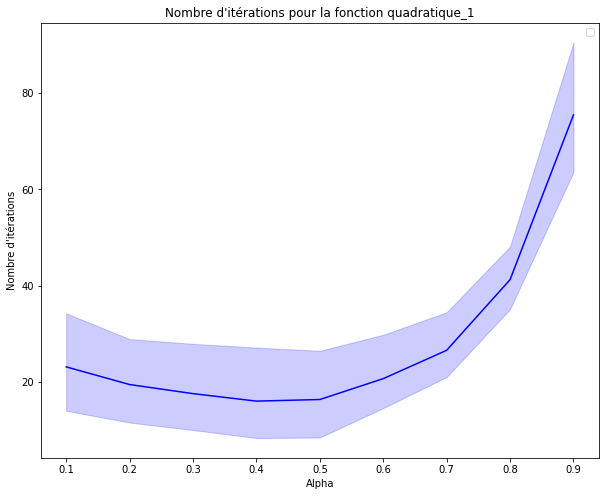

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


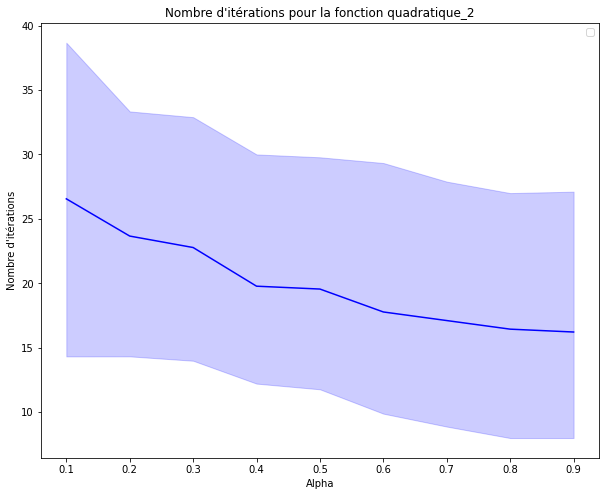

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


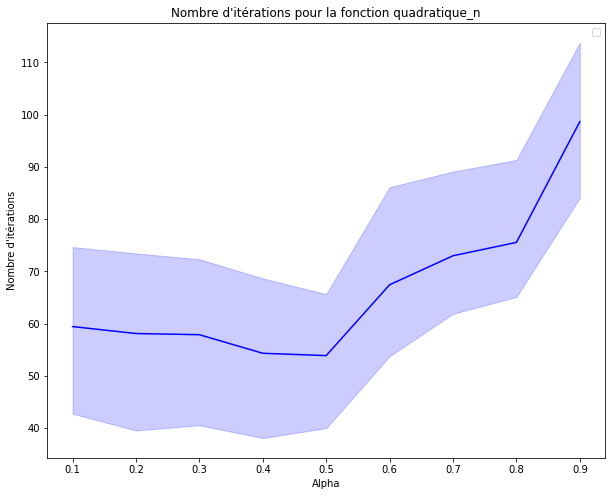

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


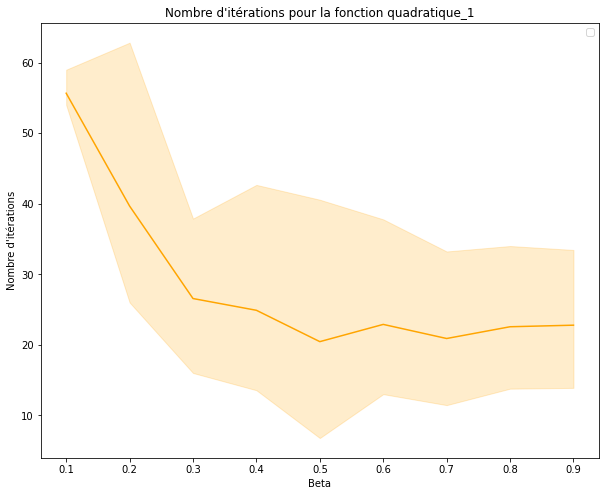

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


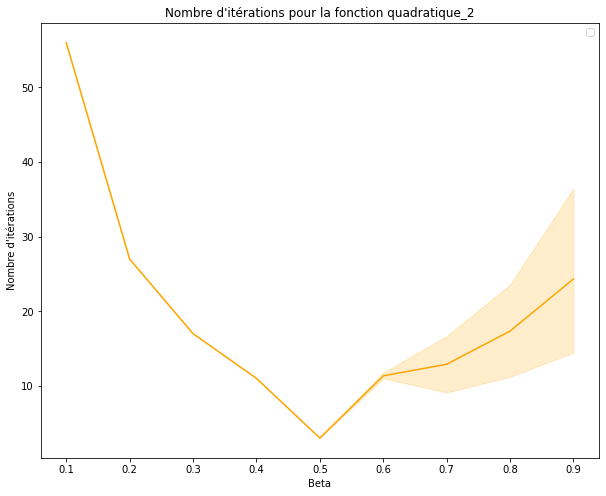

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


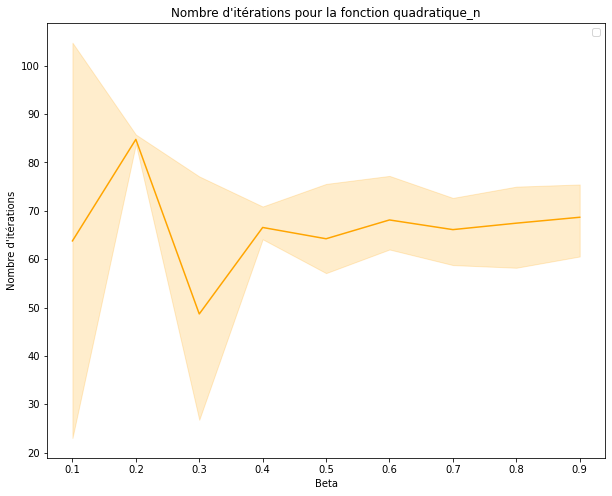

Best alpha, beta pair for function quadratique_1:
Alpha: 0.1
Beta: 0.5

Best alpha, beta pair for function quadratique_2:
Alpha: 0.1
Beta: 0.5

Best alpha, beta pair for function quadratique_n:
Alpha: 0.1
Beta: 0.1

                          alpha  beta  nb_iterations  convergence_time  \
Function      Experiment                                                 
quadratique_1 0             0.1   0.1             54          0.001999   
              1             0.1   0.2             26          0.001000   
              2             0.1   0.3             16          0.000000   
              3             0.1   0.4             11          0.000000   
              4             0.1   0.5              3          0.000000   
...                         ...   ...            ...               ...   
quadratique_n 76            0.9   0.5            106          0.025052   
              77            0.9   0.6            102          0.027000   
              78            0.9   0.7       

In [59]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def benchmark_gradient_descent(f, x0, alphas, betas):
    results = []
    for alpha in alphas:
        for beta in betas:
            start_time = time.time()
            xk = desc_grad_opti(f, x0, alpha=alpha, beta=beta)
            end_time = time.time()
            nb_iterations = len(xk)
            convergence_time = end_time - start_time
            final_value = f(xk[-1])
            results.append({
                'alpha': alpha,
                'beta': beta,
                'nb_iterations': nb_iterations,
                'convergence_time': convergence_time,
                'final_value': final_value
            })
    return pd.DataFrame(results)

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

gamma1 = 1
gamma2 = [1, 1]

quadratic1_ = lambda x: gamma1 * (x**2) + x + 1
quadratic2_ = lambda x: quadratic1_(x[0]) + quadratic1_(x[1])

functions = [quadratic1_, quadratic2_, quadraticn_]
function_names = ["quadratique_1", "quadratique_2", "quadratique_n"]
x0_values = [0, np.zeros(2), np.zeros(2)]

all_results = {}

for f, name, x0 in zip(functions, function_names, x0_values):
    print(f"Starting benchmark for function {name}...")
    result = benchmark_gradient_descent(f, x0, alphas, betas)
    all_results[name] = result

# Plotting the number of iterations for alpha
for name, result in all_results.items():
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=result, x='alpha', y='nb_iterations', color='blue')
    best_alpha = result.loc[result['nb_iterations'].idxmin(), 'alpha']
    plt.xlabel('Alpha')
    plt.ylabel('Nombre d\'itérations')
    plt.title(f"Nombre d\'itérations pour la fonction {name}")
    plt.legend()
    plt.show()

# Plotting the number of iterations for beta
for name, result in all_results.items():
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=result, x='beta', y='nb_iterations', color='orange')
    best_beta = result.loc[result['nb_iterations'].idxmin(), 'beta']
    plt.xlabel('Beta')
    plt.ylabel('Nombre d\'itérations')
    plt.title(f"Nombre d\'itérations pour la fonction {name}")
    plt.legend()
    plt.show()

# Finding the best alpha, beta pair for each function
best_results = {}
for name, result in all_results.items():
    best_result = result.loc[result['nb_iterations'].idxmin()]
    best_results[name] = (best_result['alpha'], best_result['beta'])

# Printing the best alpha, beta pairs
for name, (best_alpha, best_beta) in best_results.items():
    print(f"Best alpha, beta pair for function {name}:")
    print(f"Alpha: {best_alpha}")
    print(f"Beta: {best_beta}")
    print()

summary = pd.concat(all_results, keys=all_results.keys(), names=['Function', 'Experiment'])
print(summary)

Starting benchmark for function quadratic1_...
Starting benchmark for function quadratic2_...
Starting benchmark for function quadraticn_...


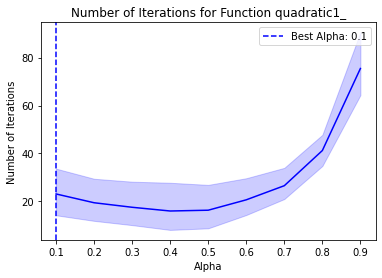

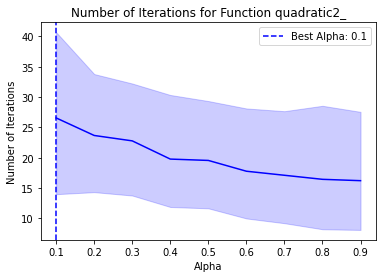

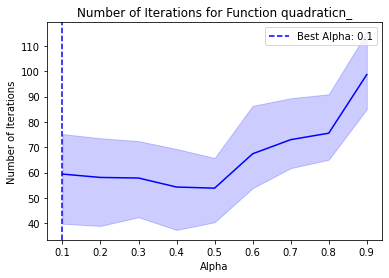

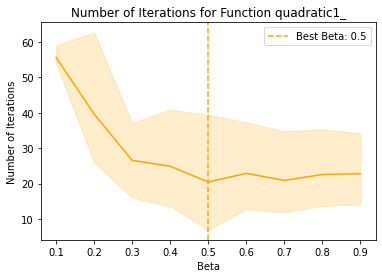

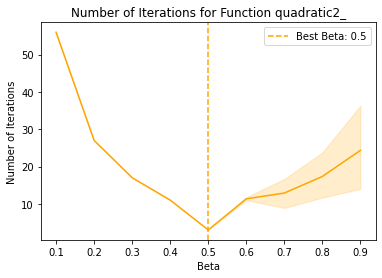

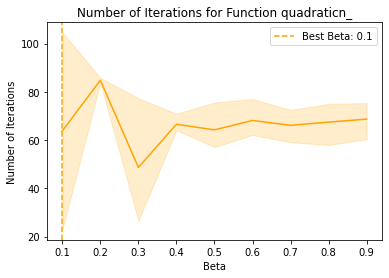

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


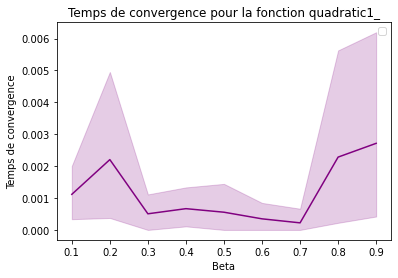

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


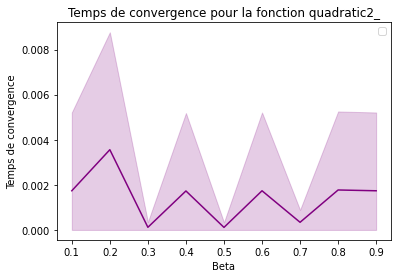

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


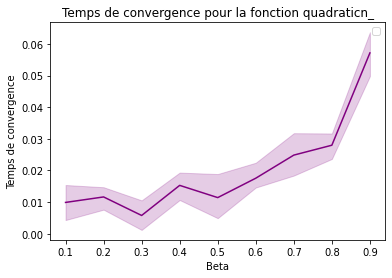

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


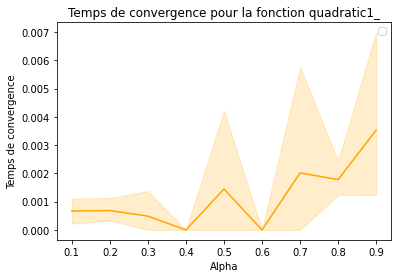

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


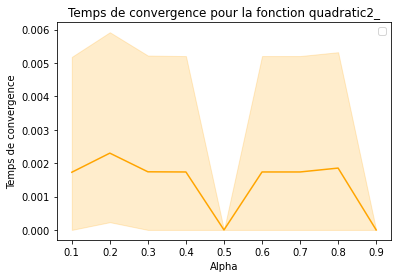

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


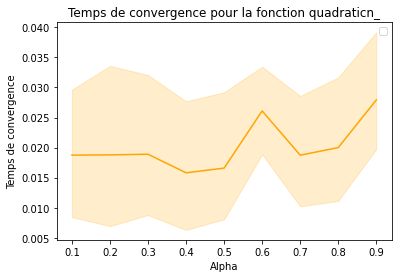

,Function,Best Alpha for Iterations,Best Beta for Iterations,Best Alpha for Convergence,Best Beta for Convergence
0,quadratic1_,0.1,0.5,0.1,0.3
1,quadratic2_,0.1,0.5,0.1,0.1
2,quadraticn_,0.1,0.1,0.1,0.2


In [67]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from IPython.display import display

def benchmark_gradient_descent(f, x0, alphas, betas):
    results = []
    for alpha in alphas:
        for beta in betas:
            start_time = time.time()
            xk = desc_grad_opti(f, x0, alpha=alpha, beta=beta)
            end_time = time.time()
            nb_iterations = len(xk)
            convergence_time = end_time - start_time
            final_value = f(xk[-1])
            results.append({
                'alpha': alpha,
                'beta': beta,
                'nb_iterations': nb_iterations,
                'convergence_time': convergence_time,
                'final_value': final_value
            })
    return pd.DataFrame(results)

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

gamma1 = 1
gamma2 = [1, 1]

quadratic1_ = lambda x: gamma1 * (x**2) + x + 1
quadratic2_ = lambda x: quadratic1_(x[0]) + quadratic1_(x[1])

functions = [quadratic1_, quadratic2_, quadraticn_]
function_names = ["quadratic1_", "quadratic2_", "quadraticn_"]
x0_values = [0, np.zeros(2), np.zeros(2)]
all_results = {}

for f, name, x0 in zip(functions, function_names, x0_values):
    print(f"Starting benchmark for function {name}...")
    result = benchmark_gradient_descent(f, x0, alphas, betas)
    all_results[name] = result

# Plotting the number of iterations for alpha
for name, result in all_results.items():
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=result, x='alpha', y='nb_iterations', color='blue')
    best_alpha_idx = result['nb_iterations'].idxmin()
    best_alpha = result.loc[best_alpha_idx, 'alpha']
    plt.axvline(x=best_alpha, color='blue', linestyle='--', label=f'Best Alpha: {best_alpha}')
    plt.xlabel('Alpha')
    plt.ylabel('Number of Iterations')
    plt.title(f"Number of Iterations for Function {name}")
    plt.legend()
    plt.show()

# Plotting the number of iterations for beta
for name, result in all_results.items():
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=result, x='beta', y='nb_iterations', color='orange')
    best_beta_idx = result['nb_iterations'].idxmin()
    best_beta = result.loc[best_beta_idx, 'beta']
    plt.axvline(x=best_beta, color='orange', linestyle='--', label=f'Best Beta: {best_beta}')
    plt.xlabel('Beta')
    plt.ylabel('Number of Iterations')
    plt.title(f"Number of Iterations for Function {name}")
    plt.legend()
    plt.show()

# Plotting the convergence time for beta
for name, result in all_results.items():
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=result, x='beta', y='convergence_time', color='purple')
    best_beta_idx = result['convergence_time'].idxmin()
    best_beta = result.loc[best_beta_idx, 'beta']
    plt.xlabel('Beta')
    plt.ylabel('Temps de convergence')
    plt.title(f"Temps de convergence pour la fonction {name}")
    plt.legend()
    plt.show()
    
# Plotting the convergence time for beta
for name, result in all_results.items():
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=result, x='alpha', y='convergence_time', color='orange')
    best_beta_idx = result['convergence_time'].idxmin()
    best_beta = result.loc[best_beta_idx, 'alpha']
    plt.xlabel('Alpha')
    plt.ylabel('Temps de convergence')
    plt.title(f"Temps de convergence pour la fonction {name}")
    plt.legend()
    plt.show()

# Finding the best alpha, beta pair for each function based on the number of iterations
best_iterations_results = {}
for name, result in all_results.items():
    min_idx = result['nb_iterations'].idxmin()
    best_alpha = result.loc[min_idx, 'alpha']
    best_beta = result.loc[min_idx, 'beta']
    best_iterations_results[name] = (best_alpha, best_beta)

# Finding the best alpha, beta pair for each function based on the convergence time
best_convergence_results = {}
for name, result in all_results.items():
    min_idx = result['convergence_time'].idxmin()
    best_alpha = result.loc[min_idx, 'alpha']
    best_beta = result.loc[min_idx, 'beta']
    best_convergence_results[name] = (best_alpha, best_beta)

# Creating a summary table
summary_data = []
for name in function_names:
    iterations_alpha, iterations_beta = best_iterations_results[name]
    convergence_alpha, convergence_beta = best_convergence_results[name]
    summary_data.append({
        'Function': name,
        'Best Alpha for Iterations': iterations_alpha,
        'Best Beta for Iterations': iterations_beta,
        'Best Alpha for Convergence': convergence_alpha,
        'Best Beta for Convergence': convergence_beta
    })
summary = pd.DataFrame(summary_data)

# Display the summary table
display(summary)

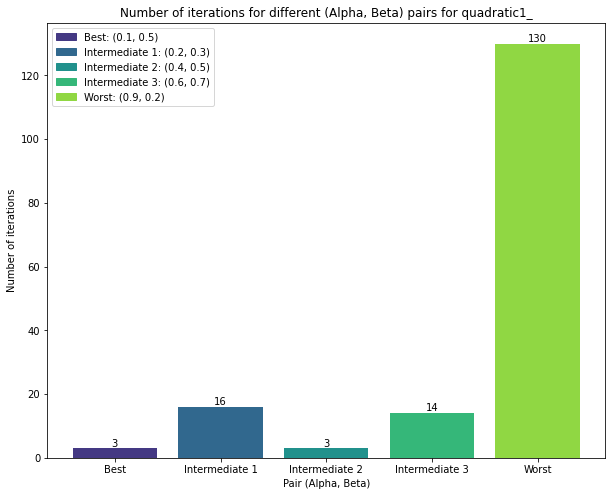

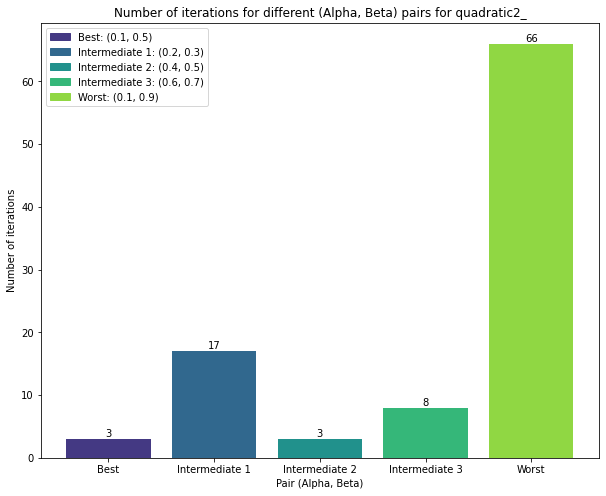

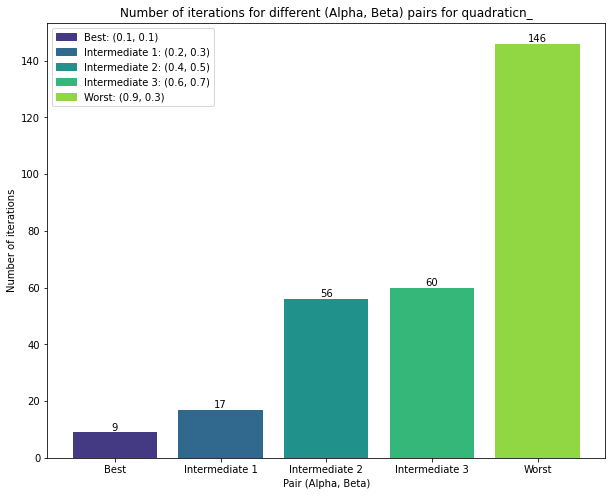

In [21]:
import matplotlib.patches as mpatches

for name, result in all_results.items():
    plt.figure(figsize=(10, 8))
    
    best_idx = result['nb_iterations'].idxmin()
    worst_idx = result['nb_iterations'].idxmax()
    best_pair = (result.loc[best_idx, 'alpha'], result.loc[best_idx, 'beta'])
    worst_pair = (result.loc[worst_idx, 'alpha'], result.loc[worst_idx, 'beta'])
    
    intermediate_pairs = [(0.2, 0.3), (0.4, 0.5), (0.6, 0.7)]
    
    pairs = [best_pair] + intermediate_pairs + [worst_pair]
    pairs_labels = ['Best'] + [f'Intermediate {i+1}' for i in range(len(intermediate_pairs))] + ['Worst']
    
    colors = sns.color_palette('viridis', n_colors=len(pairs_labels))
    color_dict = dict(zip(pairs_labels, colors))
    legend_patches = [mpatches.Patch(color=color, label=f"{label}: {pair}") 
                      for color, label, pair in zip(colors, pairs_labels, pairs)]
    
    bar_container = plt.bar(pairs_labels, [result[(result['alpha'] == pair[0]) & (result['beta'] == pair[1])]['nb_iterations'].values[0] for pair in pairs], color=colors)
    
    for rect, label in zip(bar_container, [result[(result['alpha'] == pair[0]) & (result['beta'] == pair[1])]['nb_iterations'].values[0] for pair in pairs]):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, 
                 '{}'.format(label), ha='center', va='bottom')
        
    plt.legend(handles=legend_patches)
    plt.xlabel('Pair (Alpha, Beta)')
    plt.ylabel('Number of iterations')
    plt.title(f'Number of iterations for different (Alpha, Beta) pairs for {name}')
    plt.show()

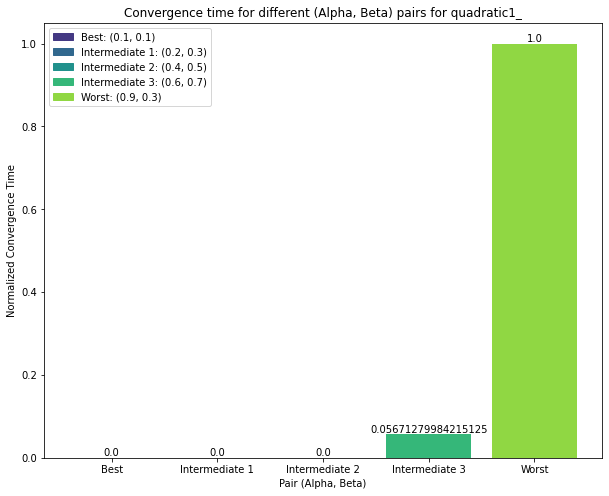

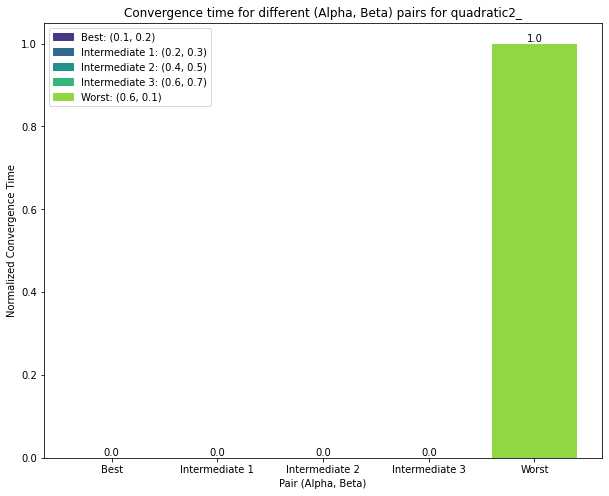

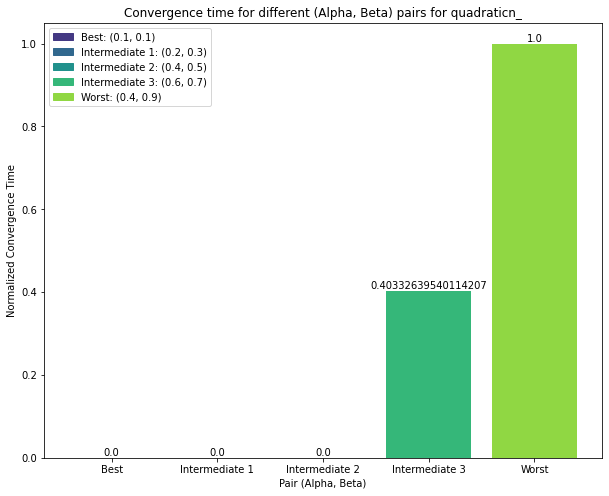

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for name, result in all_results.items():
    plt.figure(figsize=(10, 8))
    
    result['convergence_time'] = scaler.fit_transform(result[['convergence_time']])
    
    best_idx = result['convergence_time'].idxmin()
    worst_idx = result['convergence_time'].idxmax()
    best_pair = (result.loc[best_idx, 'alpha'], result.loc[best_idx, 'beta'])
    worst_pair = (result.loc[worst_idx, 'alpha'], result.loc[worst_idx, 'beta'])
    
    intermediate_pairs = [(0.2, 0.3), (0.4, 0.5), (0.6, 0.7)]
    
    pairs = [best_pair] + intermediate_pairs + [worst_pair]
    pairs_labels = ['Best'] + [f'Intermediate {i+1}' for i in range(len(intermediate_pairs))] + ['Worst']
    
    colors = sns.color_palette('viridis', n_colors=len(pairs_labels))
    color_dict = dict(zip(pairs_labels, colors))
    legend_patches = [mpatches.Patch(color=color, label=f"{label}: {pair}") 
                      for color, label, pair in zip(colors, pairs_labels, pairs)]
    
    bar_container = plt.bar(pairs_labels, [result[(result['alpha'] == pair[0]) & (result['beta'] == pair[1])]['convergence_time'].values[0] for pair in pairs], color=colors)
    
    for rect, label in zip(bar_container, [result[(result['alpha'] == pair[0]) & (result['beta'] == pair[1])]['convergence_time'].values[0] for pair in pairs]):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, 
                 '{}'.format(label), ha='center', va='bottom')
        
    plt.legend(handles=legend_patches)
    plt.xlabel('Pair (Alpha, Beta)')
    plt.ylabel('Normalized Convergence Time')
    plt.title(f'Convergence time for different (Alpha, Beta) pairs for {name}')
    plt.show()

In [65]:
# Affichage complet du tableau all_results
for name, result in all_results.items():
    print(f"Tableau des résultats pour la fonction {name}:")
    print(result.to_string(index=False))
    print()

Tableau des résultats pour la fonction Quadratique_1:
 alpha  beta  nb_iterations  convergence_time  final_value
   0.1   0.1             54          0.001003         0.75
   0.1   0.2             26          0.000998         0.75
   0.1   0.3             16          0.000000         0.75
   0.1   0.4             11          0.001000         0.75
   0.1   0.5              3          0.000000         0.75
   0.1   0.6             11          0.000000         0.75
   0.1   0.7             17          0.000000         0.75
   0.1   0.8             29          0.001000         0.75
   0.1   0.9             41          0.001000         0.75
   0.2   0.1             54          0.002001         0.75
   0.2   0.2             26          0.000000         0.75
   0.2   0.3             16          0.001001         0.75
   0.2   0.4             11          0.000000         0.75
   0.2   0.5              3          0.000000         0.75
   0.2   0.6             11          0.000000         0.75
  